In [1]:
import scanpy as sc
import anndata as ad
import pandas as pd
import numpy as np

In [2]:
annotation = pd.read_csv('/home/icb/jonas.flor/gastrulation_atlas/data/GSE208680_cell_annotation.txt', sep='\t')
data = pd.read_csv('/home/icb/jonas.flor/gastrulation_atlas/data/GSE208680_raw_counts.csv', index_col='Name')
data_normalized = pd.read_csv('/home/icb/jonas.flor/gastrulation_atlas/data/GSE208680_normalized_counts.csv', index_col=0)
db = pd.read_csv('/home/icb/jonas.flor/gastrulation_atlas/data/mouse.v12.geneID.txt', sep='\t')[['gene_ID', 'gene_short_name']]

In [33]:
adata_norm = ad.AnnData(data_normalized.transpose())
adata_norm.obs['celltype'] = pd.Categorical([annotation.loc[annotation.Cell_barcode==x, 'cluster_annotation'].values[0] for x in adata_norm.obs_names])
adata_norm.obs['Nat_Synth'] = pd.Categorical([annotation.loc[annotation.Cell_barcode==x, 'Nat_Syn'].values[0] for x in adata_norm.obs_names])
adata_norm.obs['batch'] = pd.Categorical([annotation.loc[annotation.Cell_barcode==x, 'Sample_Name'].values[0] for x in adata_norm.obs_names])
adata_norm.obs['day'] = pd.Categorical(['E8.5' for x in range(adata_norm.n_obs)])
adata_norm

AnnData object with n_obs × n_vars = 67605 × 2000
    obs: 'celltype', 'Nat_Synth', 'batch', 'day'

In [34]:
sc.pp.scale(adata_norm)
sc.pp.pca(adata_norm, n_comps=15)
sc.pp.neighbors(adata_norm)
sc.tl.umap(adata_norm)

/home/icb/jonas.flor/mambaforge/envs/subsampling/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(values) or values.dtype == bool:
/home/icb/jonas.flor/mambaforge/envs/subsampling/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1226: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/icb/jonas.flor/mambaforge/envs/subsampling/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:396: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


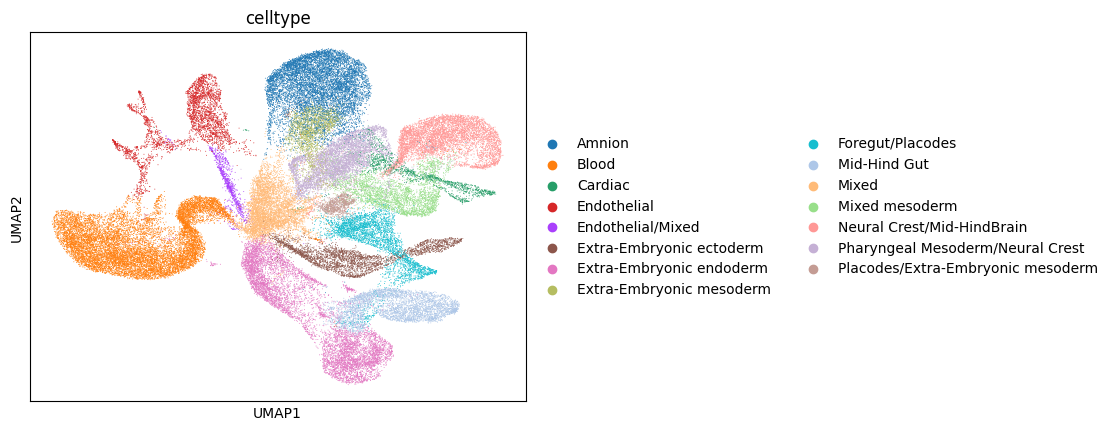

In [35]:
sc.pl.umap(adata_norm, color='celltype')

/home/icb/jonas.flor/mambaforge/envs/subsampling/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(values) or values.dtype == bool:
/home/icb/jonas.flor/mambaforge/envs/subsampling/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1226: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/icb/jonas.flor/mambaforge/envs/subsampling/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:396: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


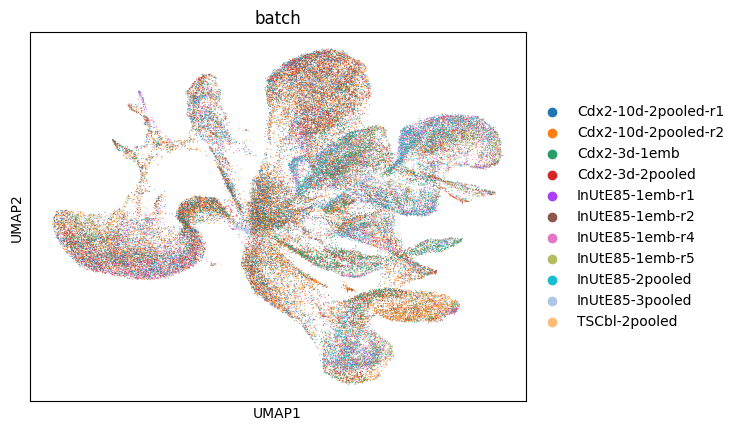

In [36]:
sc.pl.umap(adata_norm, color='batch')

/home/icb/jonas.flor/mambaforge/envs/subsampling/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(values) or values.dtype == bool:
/home/icb/jonas.flor/mambaforge/envs/subsampling/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1226: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/icb/jonas.flor/mambaforge/envs/subsampling/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:396: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


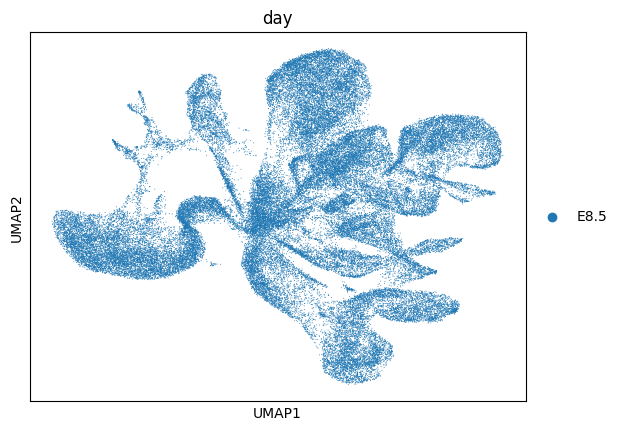

In [37]:
sc.pl.umap(adata_norm, color='day')

In [38]:
tmp = ad.AnnData(data_normalized.transpose())
tmp.obs['celltype'] = pd.Categorical([annotation.loc[annotation.Cell_barcode==x, 'cluster_annotation'].values[0] for x in tmp.obs_names])
tmp.obs['Nat_Synth'] = pd.Categorical([annotation.loc[annotation.Cell_barcode==x, 'Nat_Syn'].values[0] for x in tmp.obs_names])
tmp.obs['batch'] = pd.Categorical([annotation.loc[annotation.Cell_barcode==x, 'Sample_Name'].values[0] for x in tmp.obs_names])
tmp.obs['day'] = pd.Categorical(['E8.5' for x in range(tmp.n_obs)])

adata_synth_norm = tmp[tmp.obs.Nat_Synth=='Synthetic']
adata_nat_norm = tmp[tmp.obs.Nat_Synth=='Natural']

sc.pp.scale(adata_synth_norm)
sc.pp.scale(adata_nat_norm)

sc.pp.pca(adata_synth_norm)
sc.pp.pca(adata_nat_norm)

sc.pp.neighbors(adata_synth_norm)
sc.pp.neighbors(adata_nat_norm)

/home/icb/jonas.flor/mambaforge/envs/subsampling/lib/python3.11/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/icb/jonas.flor/mambaforge/envs/subsampling/lib/python3.11/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [39]:
adata_synth_norm.uns['iroot'] = adata_synth_norm.obs.index.get_loc(
    adata_synth_norm[(adata_synth_norm.obs.day == 'E8.5') & (adata_synth_norm.obs.celltype == 'Mixed')]
    .obs.first_valid_index()
)
adata_nat_norm.uns['iroot'] = adata_nat_norm.obs.index.get_loc(
    adata_nat_norm[(adata_nat_norm.obs.day == 'E8.5') & (adata_nat_norm.obs.celltype == 'Mixed')]
    .obs.first_valid_index()
)

sc.tl.dpt(adata_synth_norm)
sc.tl.dpt(adata_nat_norm)

In [40]:
adata = ad.AnnData(data.transpose().reindex(adata_norm.obs_names))
adata = adata[adata.obs_names.isin(list(annotation['Cell_barcode'])), :]

adata.obs['celltype'] = pd.Categorical([annotation.loc[annotation.Cell_barcode==x, 'cluster_annotation'].values[0] for x in adata.obs_names])
adata.obs['Nat_Synth'] = pd.Categorical([annotation.loc[annotation.Cell_barcode==x, 'Nat_Syn'].values[0] for x in adata.obs_names])
adata.obs['batch'] = pd.Categorical([annotation.loc[annotation.Cell_barcode==x, 'Sample_Name'].values[0] for x in adata.obs_names])
adata.obs['day'] = pd.Categorical(['E8.5' for x in range(adata.n_obs)])
adata.obsm['X_umap'] = adata_norm.obsm['X_umap']
adata.uns['batch_colors'] = adata_norm.uns['batch_colors']
adata.uns['day_colors'] = adata_norm.uns['day_colors']
adata.uns['celltype_colors'] = adata_norm.uns['celltype_colors']
adata

/tmp/ipykernel_2778308/1694512809.py:4: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['celltype'] = pd.Categorical([annotation.loc[annotation.Cell_barcode==x, 'cluster_annotation'].values[0] for x in adata.obs_names])


AnnData object with n_obs × n_vars = 67605 × 24361
    obs: 'celltype', 'Nat_Synth', 'batch', 'day'
    uns: 'batch_colors', 'day_colors', 'celltype_colors'
    obsm: 'X_umap'

In [41]:
new_names = adata.var_names.to_frame(name='gene_short_name').merge(db, on='gene_short_name', how='inner')
new_names.drop_duplicates(subset='gene_short_name', inplace=True)

adata = adata[:, adata.var_names.isin(list(new_names['gene_short_name']))]

adata.var_names = new_names['gene_ID']

In [42]:
adata_synth = adata[adata.obs.Nat_Synth=='Synthetic']
adata_nat = adata[adata.obs.Nat_Synth=='Natural']

In [43]:
adata_synth.obsm['X_pca'] = adata_synth_norm.obsm['X_pca']
adata_nat.obsm['X_pca'] = adata_nat_norm.obsm['X_pca']

/tmp/ipykernel_2778308/176409112.py:1: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata_synth.obsm['X_pca'] = adata_synth_norm.obsm['X_pca']
/tmp/ipykernel_2778308/176409112.py:2: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata_nat.obsm['X_pca'] = adata_nat_norm.obsm['X_pca']


In [44]:
adata_synth.uns['neighbors'] = adata_synth_norm.uns['neighbors']
adata_nat.uns['neighbors'] = adata_nat_norm.uns['neighbors']

adata_synth.obs['dpt_pseudotime'] = adata_synth_norm.obs['dpt_pseudotime']
adata_nat.obs['dpt_pseudotime'] = adata_nat_norm.obs['dpt_pseudotime']

In [45]:
adata_synth.obsp['distances'] = adata_synth_norm.obsp['distances']
adata_nat.obsp['distances'] = adata_nat_norm.obsp['distances']

adata_synth.obsp['connectivities'] = adata_synth_norm.obsp['connectivities']
adata_nat.obsp['connectivities'] = adata_nat_norm.obsp['connectivities']

In [46]:
adata_nat

AnnData object with n_obs × n_vars = 26948 × 22327
    obs: 'celltype', 'Nat_Synth', 'batch', 'day', 'dpt_pseudotime'
    uns: 'batch_colors', 'day_colors', 'celltype_colors', 'neighbors'
    obsm: 'X_umap', 'X_pca'
    obsp: 'distances', 'connectivities'

In [47]:
adata_nat.write('/home/icb/jonas.flor/gastrulation_atlas/data/invitro.h5ad')
adata_synth.write('/home/icb/jonas.flor/gastrulation_atlas/data/exvitro.h5ad')

In [ ]:
adata_norm.write('/home/icb/jonas.flor/gastrulation_atlas/data/in_ex_vito_norm.h5ad')

In [24]:
adata_synth_norm

AnnData object with n_obs × n_vars = 40657 × 2000
    obs: 'celltype', 'Nat_Synth', 'batch', 'day', 'dpt_pseudotime'
    var: 'mean', 'std'
    uns: 'pca', 'neighbors', 'iroot', 'diffmap_evals'
    obsm: 'X_pca', 'X_diffmap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'